In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load and Overview the Dataset

In [36]:
data = pd.read_csv("applications data.csv")

In [37]:
data.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record       1000000 non-null  int64 
 1   date         1000000 non-null  int64 
 2   ssn          1000000 non-null  int64 
 3   firstname    1000000 non-null  object
 4   lastname     1000000 non-null  object
 5   address      1000000 non-null  object
 6   zip5         1000000 non-null  int64 
 7   dob          1000000 non-null  int64 
 8   homephone    1000000 non-null  int64 
 9   fraud_label  1000000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 76.3+ MB


In [39]:
data.shape

(1000000, 10)

In [40]:
#target = data.fraud_label
#X_data = data.drop(["fraud_label"],axis=1)

## Build the Summary Statistics Table

In [41]:
data['date'] = data['date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))

In [42]:
summary = pd.DataFrame(columns = ['Column Name', '% of Records','% Null Value', 'Unique Values', 'Most Common Value'])
summary["Column Name"] = ['Application Date (date)','SSN', 'First_Name', 'Last_Name', 'Address', 'ZIP5',
       'Date_of_Birth (dob)', 'Homephone', 'Fraud_Label']
#summary

In [43]:
for i in range(9):
    summary.iloc[i,1] = (data.iloc[:,i+1].notnull().sum())
    summary.iloc[i,2] = data.iloc[:,i+1].isnull().sum()
    summary.iloc[i,3] = len(data.iloc[:,i+1].unique())
    summary.iloc[i,4] = data.iloc[:,i+1].value_counts()[:1].index.tolist()

summary.to_csv('summary1.csv', index=True)
summary
#NY_data_top_n.to_csv('NY_top.csv', index=True)

,Column Name,% of Records,% Null Value,Unique Values,Most Common Value
0,Application Date (date),1000000,0,365,[2016-08-16 00:00:00]
1,SSN,1000000,0,835819,[999999999]
2,First_Name,1000000,0,78136,[EAMSTRMT]
3,Last_Name,1000000,0,177001,[ERJSAXA]
4,Address,1000000,0,828774,[123 MAIN ST]
5,ZIP5,1000000,0,26370,[68138]
6,Date_of_Birth (dob),1000000,0,42673,[19070626]
7,Homephone,1000000,0,28244,[9999999999]
8,Fraud_Label,1000000,0,2,[0]


In [44]:
date_summary = pd.DataFrame(columns = ['Column Name', 'Earliest Date','Latest Date'])
date_summary["Column Name"] = ['Application Date (date)','Date_of_Birth (dob)']
#date_summary

In [45]:
date_summary.iloc[0,1] = data.iloc[:,1].min()
date_summary.iloc[0,2] = data.iloc[:,1].max()
date_summary.iloc[1,1] = data.iloc[:,7].min()
date_summary.iloc[1,2] = data.iloc[:,7].max()
date_summary
#date_summary.to_csv('summary2.csv', index=True)

,Column Name,Earliest Date,Latest Date
0,Application Date (date),2016-01-01 00:00:00,2016-12-31 00:00:00
1,Date_of_Birth (dob),19000101,20161031


## Data Field Exploration

### Date

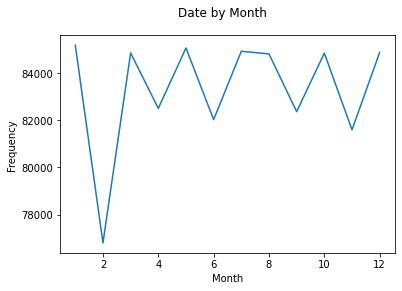

In [46]:
# Date by month

plot1 = data['date'].groupby([data['date'].dt.month.rename('month')]).agg({'count'})

fig = plt.figure()
plt.plot(plot1)
#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Month')
fig.suptitle('Date by Month')
plt.show()

Text(0.5, 0.98, 'Date by Week')

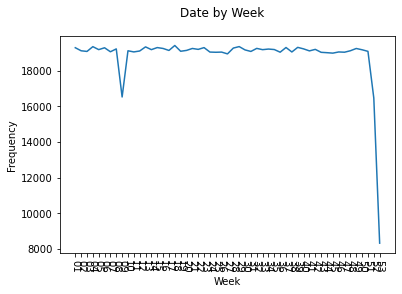

In [47]:
# Date by week

data['week'] = data['date'].apply(lambda x: datetime.strftime(x, '%V'))
plot1a = data['week'].groupby([data['week']]).agg({'count'})

fig = plt.figure()
plt.plot(plot1a)
plt.ylabel('Frequency')
plt.xlabel('Week')
plt.xticks(rotation=-90)
fig.suptitle('Date by Week')

### Date of Birth

Text(0.5, 0.98, 'Dob by Year')

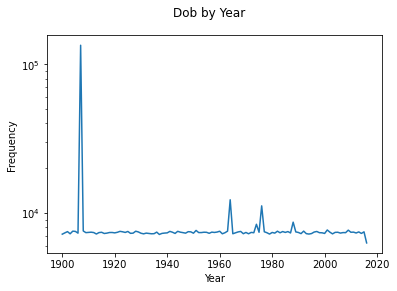

In [49]:
data['dob'] = data['dob'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
plot2 = data['dob'].groupby([data['dob'].dt.year.rename('year')]).agg({'count'})

fig2 = plt.figure()
plt.plot(plot2)
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Year')
fig2.suptitle('Dob by Year')

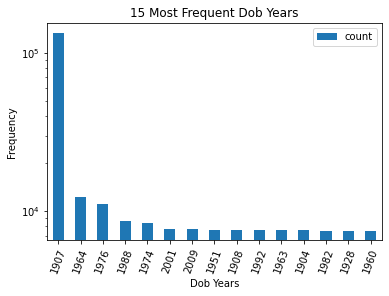

In [52]:
year_top15 = plot2.sort_values(by='count', ascending=False).head(15)
year_top15['y'] = year_top15.index
year_top15.plot.bar(x="y", y="count", rot=70, title="15 Most Frequent Dob Years")
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Dob Years')
plt.show()

### SSN

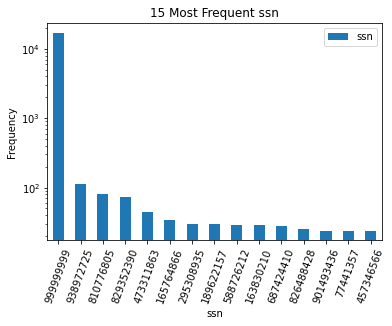

In [53]:
ssn_top15 = pd.DataFrame(data.ssn.value_counts().head(15))
ssn_top15['y'] = ssn_top15.index
ssn_top15.plot.bar(x="y", y="ssn", rot=70, title="15 Most Frequent ssn")
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('ssn')
plt.show()

### First Name

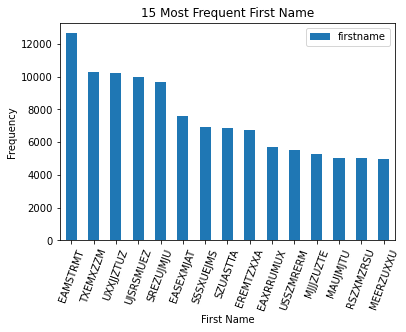

In [54]:
fname_top15 = pd.DataFrame(data.firstname.value_counts().head(15))
fname_top15['y'] = fname_top15.index
fname_top15.plot.bar(x="y", y="firstname", rot=70, title="15 Most Frequent First Name")
#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('First Name')
plt.show()

### Last Name

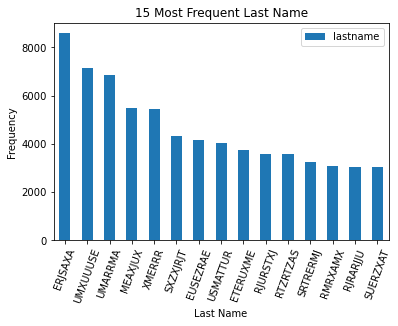

In [56]:
lname_top15 = pd.DataFrame(data.lastname.value_counts().head(15))
lname_top15['y'] = lname_top15.index
lname_top15.plot.bar(x="y", y="lastname", rot=70, title="15 Most Frequent Last Name")
#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Last Name')
plt.show()

### Address

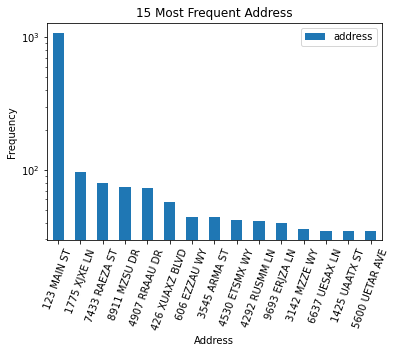

In [57]:
add_top15 = pd.DataFrame(data.address.value_counts().head(15))
add_top15['y'] = add_top15.index
add_top15.plot.bar(x="y", y="address", rot=70, title="15 Most Frequent Address")
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Address')
plt.show()

### ZIP

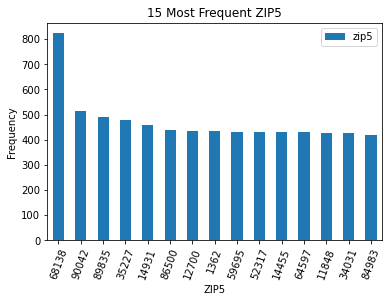

In [58]:
zip_top15 = pd.DataFrame(data.zip5.value_counts().head(15))
zip_top15['y'] = zip_top15.index
zip_top15.plot.bar(x="y", y="zip5", rot=70, title="15 Most Frequent ZIP5")
#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('ZIP5')
plt.show()

### Homephone

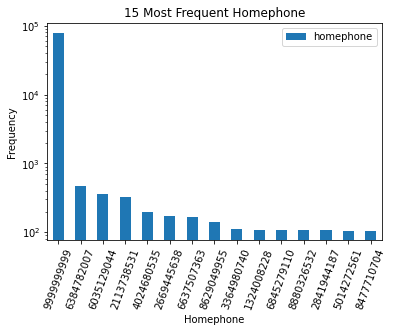

In [59]:
hphone_top15 = pd.DataFrame(data.homephone.value_counts().head(15))
hphone_top15['y'] = hphone_top15.index
hphone_top15.plot.bar(x="y", y="homephone", rot=70, title="15 Most Frequent Homephone")
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Homephone')
plt.show()

### Fraud Label

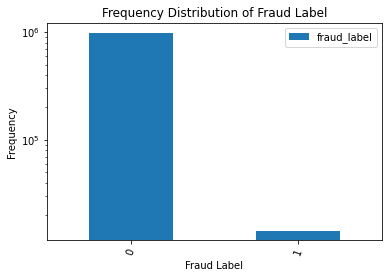

In [60]:
flabel_top15 = pd.DataFrame(data.fraud_label.value_counts().head(15))
flabel_top15['y'] = flabel_top15.index
flabel_top15.plot.bar(x="y", y="fraud_label", rot=70, title="Frequency Distribution of Fraud Label")
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Fraud Label')
plt.show()